## Keplerian Elements for Approximate Positions of the Major Planets
http://ssd.jpl.nasa.gov/txt/aprx_pos_planets.pdf

E.M. Standish  
Solar System Dynamics Group  
JPL/Caltec


general imports

In [1]:
import numpy as np
from numpy import sin, cos, tan, arctan, sqrt, pi, abs, radians, degrees
import matplotlib.pyplot as plt
from astropy.time import Time

In [2]:
%matplotlib inline

**Formulae for Computing Approximate Planetary Positions**  

Lower accuracy formulae for planetary positions have a number of important applications when one doesn't need the full accuracy of an integrated ephemeris. They are often used in observation scheduling, telescope pointing, and prediction of certain phenomena as well as in the planning and design of spacecraft missions.

Approximate positions of the major planets and Pluto may be found by using Keplerian formulae with their associated elements and rates. Such elements are not intended to represent any sort of mean; they are simply the result of being adjusted for a best fit. As such, it must be noted that the elements are not valid outside the given time-interval over which they were fit. 


|Keplerian elements       |                                                                 |
|:------------------------|:----------------------------------------------------------------|
|$a_o, \dot{a}$           |semi-major axis [au, au/cty]                                     |
|$e_o, \dot{e}$           |eccentricity [ , /cty]                                           |
|$I_o, \dot{I}$           |inclination [deg, deg/cty]                                       |
|$L_o, \dot{L}$           |mean longitude [deg, deg/cty]                                    |
|$\varpi_o, \dot{\varpi}$ |longitude of perihelion [deg, deg/cty] $\;\varpi = \omega+\Omega$|
|$\Omega, \dot{\Omega}$  |longitude of the ascending node [deg, deg/cty]                    |


---
<img src="images/elements_2.svg" alt="orbital elements" width="600"/>

---

**Table 1.**
Keplerian elements and their rates, with respect to the mean ecliptic  
and equinox of J2000, valid for the time-interval 1800 AD - 2050 AD.

In [3]:
#                          a            e            I            L             ϖ             Ω 
#                          au                       deg          deg           deg           deg
elements = np.array([( 0.38709927, 0.20563593,  7.00497902, 252.25032350,  77.45779628,  48.33076593),  # Mercury
                     ( 0.72333566, 0.00677672,  3.39467605, 181.97909950, 131.60246718,  76.67984255),  # Venus
                     ( 1.00000261, 0.01671123, -0.00001531, 100.46457166, 102.93768193,   0.0       ),  # Earth moon barycenter
                     ( 1.52371034, 0.09339410,  1.84969142,  -4.55343205, -23.94362959,  49.55953891),  # Mars
                     ( 5.20288700, 0.04838624,  1.30439695,  34.39644051,  14.72847983, 100.47390909),  # Jupiter
                     ( 9.53667594, 0.05386179,  2.48599187,  49.95424423,  92.59887831, 113.66242448),  # Saturn
                     (19.18916464, 0.04725744,  0.77263783, 313.23810451, 170.95427630,  74.01692503),  # Uranus
                     (30.06992276, 0.00859048,  1.77004347, -55.12002969,  44.96476227, 131.78422574),  # Neptune
                     (39.48211675, 0.24882730, 17.14001206, 238.92903833, 224.06891629, 110.30393684)], # Pluto
                     dtype=[('a', '<f8'), ('e', '<f8'), ('I', '<f8'), ('L', '<f8'), ('ϖ', '<f8'), ('Ω', '<f8')])

#                      au/cty        /cty       deg/cty       deg/cty         deg/cty      deg/cty
rates = np.array([( 0.00000037,  0.00001906, -0.00594749, 149472.67411175,  0.16047689, -0.12534081),  # Mercury
                  ( 0.00000390, -0.00004107, -0.00078890,  58517.81538729,  0.00268329, -0.27769418),  # Venus
                  ( 0.00000562, -0.00004392, -0.01294668,  35999.37244981,  0.32327364,  0.0       ),  # Earth moon barycenter
                  ( 0.00001847,  0.00007882, -0.00813131,  19140.30268499,  0.44441088, -0.29257343),  # Mars
                  (-0.00011607, -0.00013253, -0.00183714,   3034.74612775,  0.21252668,  0.20469106),  # Jupiter
                  (-0.00125060, -0.00050991,  0.00193609,   1222.49362201, -0.41897216, -0.28867794),  # Saturn
                  (-0.00196176, -0.00004397, -0.00242939,    428.48202785,  0.40805281,  0.04240589),  # Uranus
                  ( 0.00026291,  0.00005105,  0.00035372,    218.45945325, -0.32241464, -0.00508664),  # Neptune
                  (-0.00031596,  0.00005170,  0.00004818,    145.20780515, -0.04062942, -0.01183482)], # Pluto
                  dtype=[('da', '<f8'),('de', '<f8'),('dI', '<f8'),('dL', '<f8'),('dϖ', '<f8'),('dΩ', '<f8')])

In [4]:
planets = ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune', 'Pluto']

**JPL Ephemeris Time $(\mathrm{T_{eph}})$** is a relativistic coordinate time used by JPL for high precision ephemeris and has been used for the ephemerides in the Astronomical Almanac starting in 1984.

**Terrestrial Time $(\mathrm{TT})$** is the "standard epoch" for modern astrometric reference data, designated J2000.0, is expressed as a TT instant: J2000.0 is 2000 January 1, 12h TT (JD 2451545.0 TT) at the geocenter. TT runs at the same rate as a time scale based on SI seconds on the surface of the Earth and is a constant offset from TAI. This offset of $32.184$ s is to preserve continuity with previous "dynamical" time scales, Terrestrial Dynamical Time (TDT) and Ephemeris Time (ET). It differs from Terrestrial Time only by small periodic terms with an amplitude not exceeding 2 milliseconds.

$\mathrm{T_{eph}} \approx \mathrm{TT}$.

$\mathrm{TT} = \mathrm{TAI} + 32.184\ \mathrm{s}$.

Therefore,

$\mathrm{TT} =  \mathrm{UTC} + \Delta\mathrm{AT} + 32.184\ \mathrm{s}$.

In [5]:
time = Time('2019-03-13 23:00:00')
#time = Time.now();
TT = time.tt.jd; TT

2458556.459134074

**Compute each of the planets six elements**

$a = a_o + \dot{a}\mathrm{T}$, etc.,

where  $\mathrm{T}$ is the number of centuries past J2000.0 (JD 2451545.0 TT).

$\mathrm{T} = (\mathrm{TT}-2451545.0)\ /\ 36525$

In [6]:
T = (TT-2451545.0)/36525; T

0.19196328909168864

In [7]:
a = elements['a'] + T*rates['da'] # semi-major axis
e = elements['e'] + T*rates['de'] # eccentricity
I = radians(elements['I'] + T*rates['dI']) # inclination in radians
L = radians(elements['L'] + T*rates['dL']) # mean longitude in radians
ϖ = radians(elements['ϖ'] + T*rates['dϖ']) # longitude of perihelion in radians
Ω = radians(elements['Ω'] + T*rates['dΩ']) # longitude of the ascending node in radians

In [8]:
print(f'a = {a}\n')
print(f'e = {e}\n')
print(f'I = {degrees(I)}\n')
print(f'L = {degrees(L)}\n')
print(f'ϖ = {degrees(ϖ)}\n')
print(f'Ω = {degrees(Ω)}\n')

a = [ 0.38709934  0.72333641  1.00000369  1.52371389  5.20286472  9.53643587
 19.18878805 30.06997323 39.4820561 ]

e = [0.20563959 0.00676884 0.0167028  0.09340923 0.0483608  0.05376391
 0.047249   0.00860028 0.24883722]

I = [ 7.00383732e+00  3.39452461e+00 -2.50059728e-03  1.84813051e+00
  1.30404429e+00  2.48636353e+00  7.72171476e-01  1.77011137e+00
  1.71400213e+01]

L = [ 2.89455165e+04  1.14152514e+04  7.01102251e+03  3.66968203e+03
  6.16956289e+02  2.84628141e+02  3.95490924e+02 -1.31838345e+01
  2.66803606e+02]

ϖ = [ 77.48860195 131.60298227 102.9997386  -23.85831902  14.76927715
  92.51845104 171.03260746  44.9028705  224.06111693]

Ω = [ 48.3067051   76.62653546   0.          49.50337555 100.51320226
 113.60700891  74.0250654  131.78324929 110.30166499]



**Compute the argument of perihelion**

$\omega = \varpi - \Omega$

In [9]:
ω = ϖ - Ω        # argument of perihelion

In [10]:
print(f'ω = {degrees(ω)}')

ω = [ 29.18189686  54.97644681 102.9997386  -73.36169457 -85.74392511
 -21.08855788  97.00754206 -86.8803788  113.75945194]


**Compute the mean anomoly**
$M = L - \varpi$

function to modulus the mean anomoly so that $-180^\circ \leq \theta \leq +180^\circ$

In [11]:
def mod(θ):
    while θ > pi: θ -= 2*pi  # in radians
    return θ

vmod = np.vectorize(mod)

In [12]:
M = vmod(L - ϖ)  # mean anomaly

In [13]:
print(f'M = {degrees(M)}')

M = [  68.02787337  123.64842943   68.02277376   93.54034459 -117.8129884
 -167.89031023 -135.54168357  -58.08670501   42.74248928]


**Kepler's Equation**

$M = E - e \cdot \sin(E)$

Function to solve Kepler's equation using the Newton-Raphson method.

In [14]:
def newton(M, e, eps=1e-15, maxitr=100):
    E = M + e*sin(M)
    itr = 0; ΔE = 1
    while (np.abs(ΔE) > eps) & (itr < maxitr):
        ΔM = M - (E - e*sin(E))
        ΔE = ΔM/(1 - e*cos(E)) # error at the current iter
        E += ΔE
        itr += 1
    return E

vnewton = np.vectorize(newton)

**Compute the eccentric anomaly**

In [15]:
E = vnewton(M,e)

In [16]:
print(f'E = {degrees(E)}')

E = [  79.61722736  123.9700648    68.91570459   98.82888465 -120.20759643
 -168.50422935 -137.37497103  -58.50688267   54.32412887]


The **true anomaly** can be derived from the eccentric anomaly

$\nu = 2 \arctan{\sqrt{\frac{1 + e}{1 - e}}}\cdot\tan{\frac{E}{2}}$

In [17]:
ν = (2 * arctan(sqrt((1 + e) / (1 - e)) * tan(E / 2)))

**Compute the heliocentric coordinates $\mathrm{\mathbf{r}'}$**, in the planets orbital plane with x-axis aligned toward perihelion.

$x = a\cdot(\cos{E}-e)$

$y = a\cdot\sqrt{1-e^2}\cdot sin{E}$

$z = 0$

In [18]:
x = a*(cos(E)-e)
y = a*sqrt(1-e**2)*sin(E)
z = 0

In [19]:
for i in zip(planets, x, y):
    print('{:10} ({},{},0)'.format(i[0],i[1],i[2]))

Mercury    (-0.009838588937666775,0.3726231622418271,0)
Venus      (-0.4090673670960118,0.5998705660136182,0)
Earth      (0.3430395415224226,0.9329254529652453,0)
Mars       (-0.3761946660018073,1.4990765537201023,0)
Jupiter    (-2.8693555909870168,-4.491096802442082,0)
Saturn     (-9.85784546340221,-1.8978208652688267,0)
Uranus     (-15.025786840555211,-12.98008541800934,0)
Neptune    (15.449827683687353,-25.639805806735257,0)
Pluto      (13.201297024990438,31.063599114128145,0)


**Compute the coordinates $\mathrm{\mathbf{r}_{ecl}}$**, in the J2000 ecliptic plane with x-axis aligned toward the equinox.

$ x_{ecl} = x\ (\cos{\omega}\cos{\Omega}-\sin{\omega}\sin{\Omega}\cos{I}) + y\ (-\sin{\omega}\cos{\Omega}-\cos{\omega}\sin{\Omega}\cos{I})$

$ y_{ecl} = x\ (\cos{\omega}\sin{\Omega}+\sin{\omega}\cos{\Omega}\cos{I}) + y\ (-\sin{\omega}\sin{\Omega}+\cos{\omega}\cos{\Omega}\cos{I})$

$ z_{ecl} = x\ (\sin{\omega}\sin{I}) + y\ (\cos{\omega}\sin{I})$


**Rotation Matrices**

\begin{equation}\left[\begin{matrix}\cos{\left (\Omega \right )} & - \sin{\left (\Omega \right )} & 0\\\sin{\left (\Omega \right )} & \cos{\left (\Omega \right )} & 0\\0 & 0 & 1\end{matrix}\right]\cdot\left[\begin{matrix}1 & 0 & 0\\0 & \cos{\left (I \right )} & - \sin{\left (I \right )}\\0 & \sin{\left (I \right )} & \cos{\left (I \right )}\end{matrix}\right]\cdot\left[\begin{matrix}\cos{\left (\omega \right )} & - \sin{\left (\omega \right )} & 0\\\sin{\left (\omega \right )} & \cos{\left (\omega \right )} & 0\\0 & 0 & 1\end{matrix}\right]\cdot\left[\begin{matrix}x\\y\\z\end{matrix}\right]=\\[18pt]
\end{equation}

\begin{equation}
\left[\begin{matrix}x \left(- \sin{\left (\Omega \right )} \sin{\left (\omega \right )} \cos{\left (I \right )} + \cos{\left (\Omega \right )} \cos{\left (\omega \right )}\right) + y \left(- \sin{\left (\Omega \right )} \cos{\left (I \right )} \cos{\left (\omega \right )} - \sin{\left (\omega \right )} \cos{\left (\Omega \right )}\right) + z \sin{\left (I \right )} \sin{\left (\Omega \right )}\\x \left(\sin{\left (\Omega \right )} \cos{\left (\omega \right )} + \sin{\left (\omega \right )} \cos{\left (I \right )} \cos{\left (\Omega \right )}\right) + y \left(- \sin{\left (\Omega \right )} \sin{\left (\omega \right )} + \cos{\left (I \right )} \cos{\left (\Omega \right )} \cos{\left (\omega \right )}\right) - z \sin{\left (I \right )} \cos{\left (\Omega \right )}\\x \sin{\left (I \right )} \sin{\left (\omega \right )} + y \sin{\left (I \right )} \cos{\left (\omega \right )} + z \cos{\left (I \right )}\end{matrix}\right]
\end{equation}

In [20]:
x_ecl, y_ecl, z_ecl = (( cos(ω)*cos(Ω) - sin(ω)*sin(Ω)*cos(I) )*x + ( -sin(ω)*cos(Ω) - cos(ω)*sin(Ω)*cos(I) )*y,
                       ( cos(ω)*sin(Ω) + sin(ω)*cos(Ω)*cos(I) )*x + ( -sin(ω)*sin(Ω) + cos(ω)*cos(Ω)*cos(I) )*y,
                       (            sin(ω)*sin(I)             )*x + (             cos(ω)*sin(I)             )*y)

In [21]:
for i in zip(planets, x_ecl, y_ecl, z_ecl):
    print('{:10} ({},{},{})'.format(i[0],i[1],i[2],i[3]))

Mercury    (-0.3641198237183977,0.0695269360649415,0.03908424245252707)
Venus      (-0.17693902020957758,-0.7041825671535268,0.0005495786616173115)
Earth      (-0.9861811731049618,0.12438939513548378,-5.428807940696223e-06)
Mars       (0.26260519091868334,1.5228732297039314,0.025467245536732297)
Jupiter    (-1.6290057760666645,-5.074069558487239,0.0575351510688351)
Saturn     (2.330684733034777,-9.764261991266352,0.07705620078311133)
Uranus     (16.864202275733078,10.47966116220537,-0.1796417689308078)
Neptune    (29.036516109377658,-7.259995528532706,-0.5196291160662004)
Pluto      (12.097944100875868,-31.509441368633752,-0.127617530140534)


**Plot the positions of the planets**

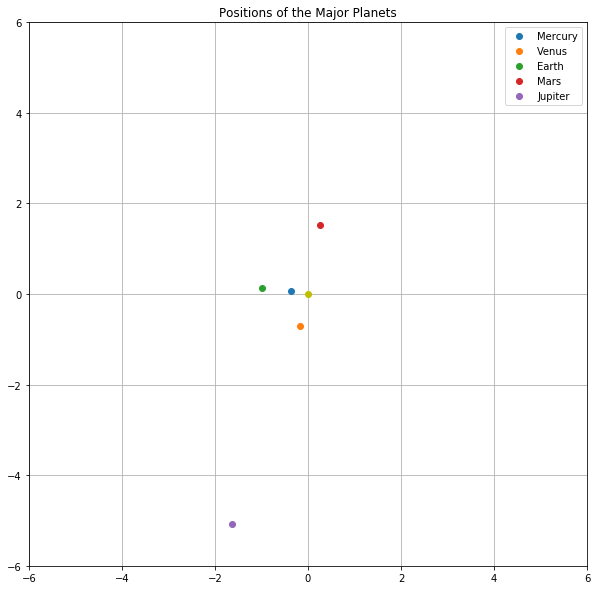

In [22]:
plt.figure(figsize=(10,10))
plt.title('Positions of the Major Planets')
plt.plot(0,0, 'oy')
for p in planets[:5]:
    i = planets.index(p)
    plt.plot(x_ecl[i], y_ecl[i], 'o', label=p)
ax = plt.gca()
ax.set_xlim(-6,6)
ax.set_ylim(-6,6)
plt.legend()
plt.grid()

**Compute the equatorial coordinates $\mathrm{\mathbf{r}_{eq}}$**, in the J2000 equatorial plane.

In [23]:
ε = radians(23.43928)

In [24]:
x_eq = x_ecl
y_eq = cos(ε)*y_ecl - sin(ε)*z_ecl
z_eq = sin(ε)*y_ecl + cos(ε)*z_ecl

In [25]:
for i in zip(planets, x_eq, y_eq, z_eq):
    print('{:10} ({},{},{})'.format(i[0],i[1],i[2],i[3]))

Mercury    (-0.3641198237183977,0.048242910182932294,0.06351530889280087)
Venus      (-0.17693902020957758,-0.6462935378443975,-0.27960338492265946)
Earth      (-0.9861811731049618,0.11412720779854545,0.04947425685900799)
Mars       (0.26260519091868334,1.387078704563988,0.6291296541168598)
Jupiter    (-1.6290057760666645,-4.678254351533963,-1.96556058169901)
Saturn     (2.330684733034777,-8.989187162221569,-3.8133009394380126)
Uranus     (16.864202275733078,9.686359301247636,4.003749833208063)
Neptune    (29.036516109377658,-6.45421972868661,-3.3646095147002075)
Pluto      (12.097944100875868,-28.85858635667196,-12.650817170913278)


---

**Coordinate transformations using matrices**

In [26]:
P = np.matrix([x[0],y[0],0]); P.T

matrix([[-0.00983859],
        [ 0.37262316],
        [ 0.        ]])

In [27]:
α = np.matrix([[cos(ω[0]), -sin(ω[0]), 0], [sin(ω[0]), cos(ω[0]), 0], [0, 0, 1]])
β = np.matrix([[1, 0, 0], [0, cos(I[0]), -sin(I[0])], [0, sin(I[0]), cos(I[0])]])
γ = np.matrix([[cos(Ω[0]), -sin(Ω[0]), 0], [sin(Ω[0]), cos(Ω[0]), 0], [0, 0, 1]])
δ = np.matrix([[1, 0, 0], [0, cos(ϵ), -sin(ϵ)], [0, sin(ϵ), cos(ϵ)]])

In [28]:
α

matrix([[ 0.87307618, -0.48758383,  0.        ],
        [ 0.48758383,  0.87307618,  0.        ],
        [ 0.        ,  0.        ,  1.        ]])

In [29]:
β

matrix([[ 1.        ,  0.        ,  0.        ],
        [ 0.        ,  0.99253799, -0.12193582],
        [ 0.        ,  0.12193582,  0.99253799]])

In [30]:
γ

matrix([[ 0.66514297, -0.74671603,  0.        ],
        [ 0.74671603,  0.66514297,  0.        ],
        [ 0.        ,  0.        ,  1.        ]])

In [31]:
δ

matrix([[ 1.        ,  0.        ,  0.        ],
        [ 0.        ,  0.91748214, -0.39777698],
        [ 0.        ,  0.39777698,  0.91748214]])

In [32]:
γ*β*α*P.T

matrix([[-0.36411982],
        [ 0.06952694],
        [ 0.03908424]])

---

In [33]:
from poliastro import ephem
from poliastro.bodies import Mercury, Venus, Earth, Mars, Jupiter, Sun
from poliastro.twobody import Orbit
from poliastro.plotting import OrbitPlotter

In [34]:
epoch = Time("2019-03-13 23:00:00",scale='tdb')
mercury= Orbit.from_body_ephem(Mercury, epoch)
venus= Orbit.from_body_ephem(Venus, epoch)
earth= Orbit.from_body_ephem(Earth, epoch)
mars = Orbit.from_body_ephem(Mars, epoch)
jupiter = Orbit.from_body_ephem(Jupiter, epoch)

/home/chris/.anaconda/lib/python3.7/site-packages/poliastro/twobody/orbit.py:502: UserWarning:

Frame <class 'astropy.coordinates.builtin_frames.icrs.ICRS'> does not support 'obstime', time values were not returned



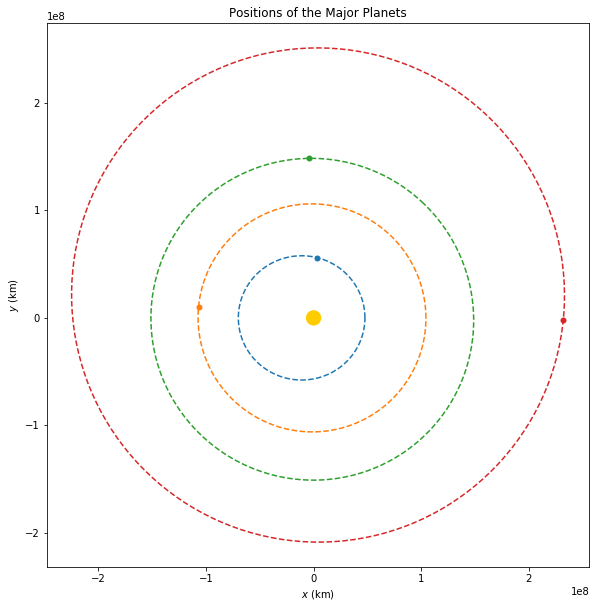

In [35]:
op = OrbitPlotter()
op.ax.set_title('Positions of the Major Planets')
op.ax.figure.set_size_inches(10,10)
op.plot(mercury)
op.plot(venus)
op.plot(earth)
op.plot(mars)
# op.ax.figure.savefig('orbits.pdf')